# 1 - Perkenalan

**Bab pengenalan harus diisi dengan identitas.**

---------

**Hussein MS | Batch 10 | Phase 1**

------

# 2. Judul/Penanda Soal 

**Soal dan judul problem yang dikerjakan**

------

Objektif :  

+ memahami konsep supervised learning dan unsupervised learning
+ mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
+ mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
+ melakukan evaluasi model
+ melakukan model tuning
+ melakukan model deployment

Problem : 

`According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.`

Mengetahui permasalahan yang terjadi, pada kasus ini akan dibuat model machine learning, untuk memprediksi apakah suatu transaksi yang terjadi merupakan transaksi fraudulent atau tidak. 


---

**Dict.** 

distancefromhome - the distance from home where the transaction happened.

distancefromlast_transaction - the distance from last transaction happened.

ratiotomedianpurchaseprice - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

usedpinnumber - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

------

# 3. Import Libraries

**Berisi semua library yang digunakan dalam project.**

---

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import calendar
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from feature_engine.outliers import Winsorizer

Import library yang dibutuhkan

# 4. Data Loading

**Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.**

---

In [2]:
pd.options.display.max_columns = None

untuk menunjukan semua kolom 

In [3]:
df = pd.read_csv("card_transdata.csv", na_values='unknown')

Import dataset, kita set 'unknown' sebagai null values

In [4]:
#ubah dataset kita ke bentuk integer karena semua datanya berbentuk float
df = df.astype(int) 

In [5]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57,0,1,1,1,0,0,0
1,10,0,1,1,0,0,0,0
2,5,0,0,1,0,0,1,0
3,2,5,0,1,1,0,1,0
4,44,0,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2,0,1,1,1,0,0,0
999996,19,2,2,1,1,0,0,0
999997,2,1,0,1,1,0,1,0
999998,4,0,0,1,0,0,1,0


In [6]:
df.shape

(1000000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype
---  ------                          --------------    -----
 0   distance_from_home              1000000 non-null  int32
 1   distance_from_last_transaction  1000000 non-null  int32
 2   ratio_to_median_purchase_price  1000000 non-null  int32
 3   repeat_retailer                 1000000 non-null  int32
 4   used_chip                       1000000 non-null  int32
 5   used_pin_number                 1000000 non-null  int32
 6   online_order                    1000000 non-null  int32
 7   fraud                           1000000 non-null  int32
dtypes: int32(8)
memory usage: 30.5 MB


Dataset yang diolah mempunyai bentuk ***1 juta Baris dan 8 Kolom*** <br> 
Tidak terdapat *missing value* pada dataset. handling *missing value* tidak diperlukan pada tahap preprocessing

In [8]:
#cek sebarang missing value
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Tidak ditemukan Missing Value pada Kolom 

---

In [9]:
df_cop = df.copy()

membuat copy dataset yang nantinya akan digunakan dalam proses split train-set

In [10]:
df_cop1 = df_cop.copy()

copy lain dari dataset untuk EDA 

# 5. EDA 

**Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.**

----

In [11]:
df_cop1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57,0,1,1,1,0,0,0
1,10,0,1,1,0,0,0,0
2,5,0,0,1,0,0,1,0
3,2,5,0,1,1,0,1,0
4,44,0,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2,0,1,1,1,0,0,0
999996,19,2,2,1,1,0,0,0
999997,2,1,0,1,1,0,1,0
999998,4,0,0,1,0,0,1,0


In [12]:
df_cop1.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [13]:
num_eda = df_cop1[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']]
cat_eda = df_cop1[['used_chip','used_pin_number','online_order','repeat_retailer','fraud']]

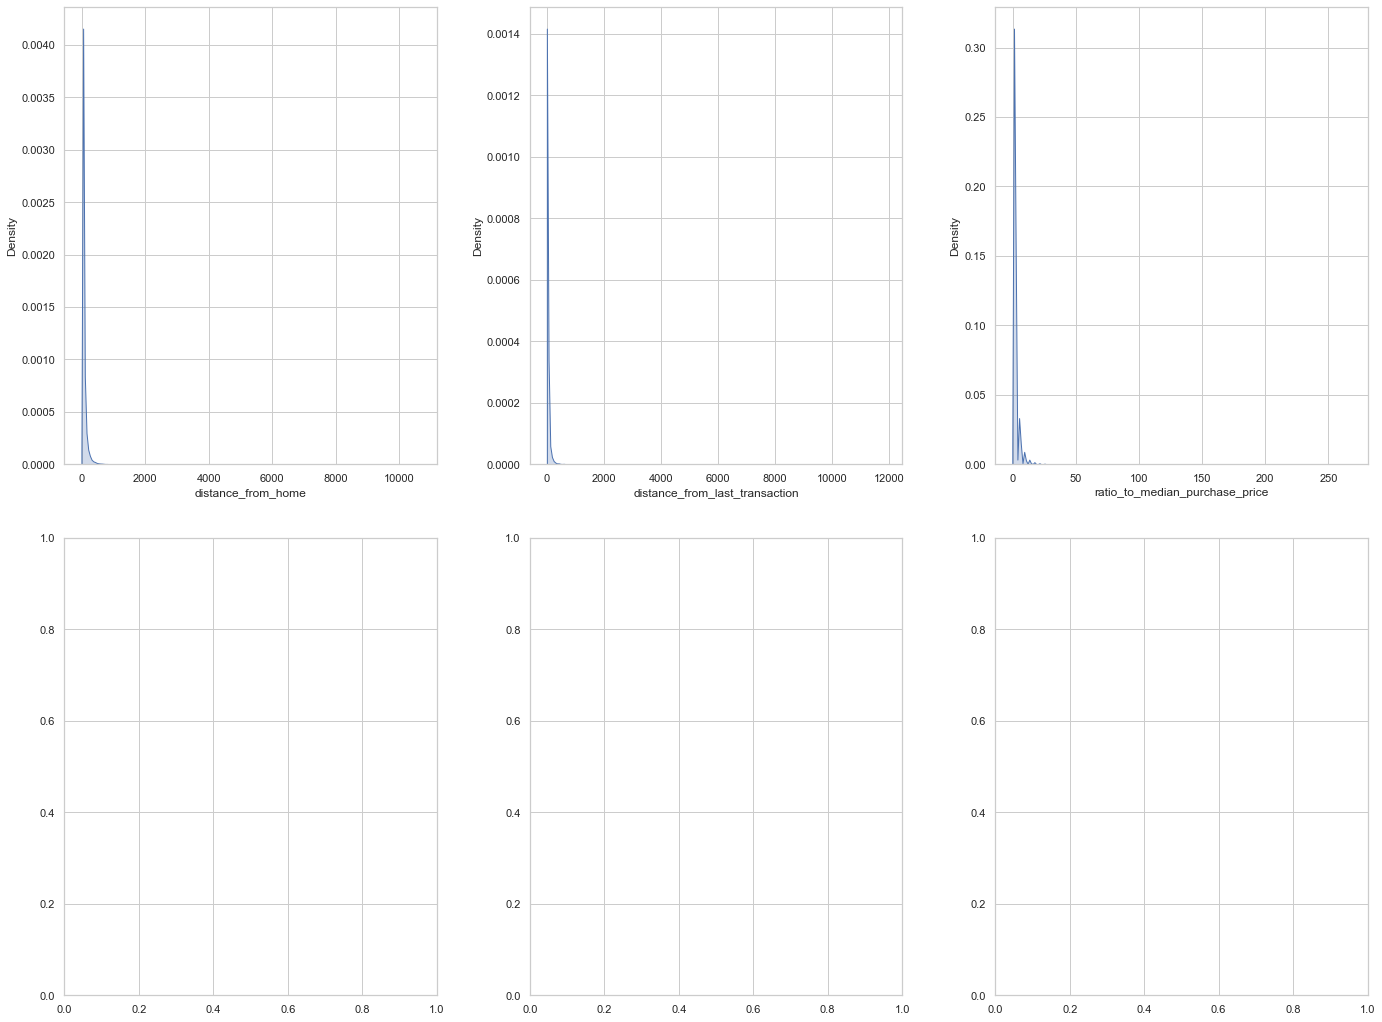

In [14]:
sns.set_theme(style="whitegrid")
figeda, axeseda = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
i = 0
j = 0

for col in num_eda.columns:
    sns.kdeplot(data=num_eda, x=col, fill=True, ax=axeseda[i][j])
    j += 1
    if j > 3:
        j = 0
        i += 1
    if i == 1:
        break
figeda.tight_layout(pad=3.0)

Berdasarkan pengelompokan numerical Data yang sudah dilakukan, dapat kita ambil kesimpulan berupa : 

+ Semua data yang kita kelompokan tadi memiliki distribusi skew
+ Hampir semua kolom memiliki outliers

---

In [15]:
cat_eda

,used_chip,used_pin_number,online_order,repeat_retailer,fraud
0,1,0,0,1,0
1,0,0,0,1,0
2,0,0,1,1,0
3,1,0,1,1,0
4,1,0,1,1,0
...,...,...,...,...,...
999995,1,0,0,1,0
999996,1,0,0,1,0
999997,1,0,1,1,0
999998,0,0,1,1,0


Jika dilihat value datanya, beberapa kolom diatas bentuknya binnary. Maka bisa diasumsikan bahwa data diatas merupakan data kategorik yang di Numerik. 

**Kita akan cari tau ciri-ciri CC yang terbukti fraud**

In [16]:
uc = df_cop1.groupby(by=['used_chip','fraud']).size().reset_index(name='count')
uc_f = uc[uc['fraud']==1][['used_chip','count']]
uc_f['used_chip'].replace({1:'With Chip',0:'No Chip'},inplace=True)

In [17]:
figuc = px.pie(uc_f, values='count', names='used_chip', title='Transaksi Fraud yang menggunakan Kartu Chip')
figuc.update_traces(textposition='outside', textinfo='percent+label')
figuc.show()

Bisa dilihat, untuk kasus Fraud yang terbukti 'Yes', ternyata lebih dari 70% **Credit Cardnya Tanpa Chip**. ini membuktikan, bahwa Chip mampu mengurangi Resiko terjadinya Fraud Credit Card

---

In [18]:
upn = df_cop1.groupby(by=['used_pin_number','fraud']).size().reset_index(name='count')
upn_f = upn[upn['fraud']==1][['used_pin_number','count']]
upn_f['used_pin_number'].replace({1:'With Pin',0:'No Pin'},inplace=True)

In [19]:
figupn = px.pie(upn_f, values='count', names='used_pin_number', title='Transaksi Fraud yang menggunakan Pin Number')
figupn.update_traces(textposition='outside', textinfo='percent+label')
figupn.show()

Hampir semua kasus Fraud yang terjadi, Credit Cardnya **tidak memiliki Pin Number**. 

---

In [20]:
od = df_cop1.groupby(by=['online_order','fraud']).size().reset_index(name='count')
od_f = od[od['fraud']==1][['online_order','count']]
od_f['online_order'].replace({1:'Online Order',0:'Offline Order'},inplace=True)

In [21]:
figod = px.pie(od_f, values='count', names='online_order', title='Transaksi Fraud yang menggunakan Order Online')
figod.update_traces(textposition='outside', textinfo='percent+label')
figod.show()

Presentase Fraud terjadi **hampir semua case** nya dilakukan dengan cara **Online Order / Online Shopping**. 

---

In [22]:
rt = df_cop1.groupby(by=['repeat_retailer','fraud']).size().reset_index(name='count')
rt_f = rt[rt['fraud']==1][['repeat_retailer','count']]
rt_f['repeat_retailer'].replace({1:'Repeat Retailer',0:'New Retailer'},inplace=True)

In [23]:
figrt = px.pie(rt_f, values='count', names='repeat_retailer', title='Transaksi Fraud Dari Tempat Retailer')
figrt.update_traces(textposition='outside', textinfo='percent+label')
figrt.show()

Ternyata Kasus yang terjadi, Lebih dari 80% dilakukan di **Tempat Retailer yang sama**. 

---

Kesimpulan dari EDA awal : 

**Numerical Kolom :** 

+ Semua data yang kita kelompokan tadi memiliki distribusi skew
+ Hampir semua kolom memiliki outliers

**Kategorical Kolom :** 

Ciri-Ciri CC yang Terbukti Menggunakan Fraud : 

+ No Chip 
+ No Pin 
+ Mayoritas dilakukan secara Online 
+ DIlakukan ditempat Retailer yang sama 


**Cek Central Tendency**

In [24]:
eda_mean = df_cop1[num_eda.columns].mean().rename('mean')
eda_median = df_cop1[num_eda.columns].median().rename('median')
eda_mode = df_cop1[cat_eda.columns].mode().iloc[0].rename('mode')

Membuat fungsi central tendency untuk dilihat distribusi datanya

----

In [25]:
#gabungkan fungsi yang telah dibuat ke satu satuan agar mudah dibaca
central_tendency = pd.concat([eda_mean, eda_median, eda_mode], axis=1)
central_tendency

,mean,median,mode
distance_from_home,26.128842,9.0,NaN
distance_from_last_transaction,4.623460,0.0,NaN
ratio_to_median_purchase_price,1.355041,0.0,NaN
used_chip,NaN,NaN,0.0
used_pin_number,NaN,NaN,0.0
online_order,NaN,NaN,1.0
repeat_retailer,NaN,NaN,1.0
fraud,NaN,NaN,0.0


Beberapa Kolom nampak Terdistribusi Skew

In [26]:
df_cop.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.128842,4.623460,1.355041,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.391210,25.828458,2.791779,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.000000,11851.000000,267.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----

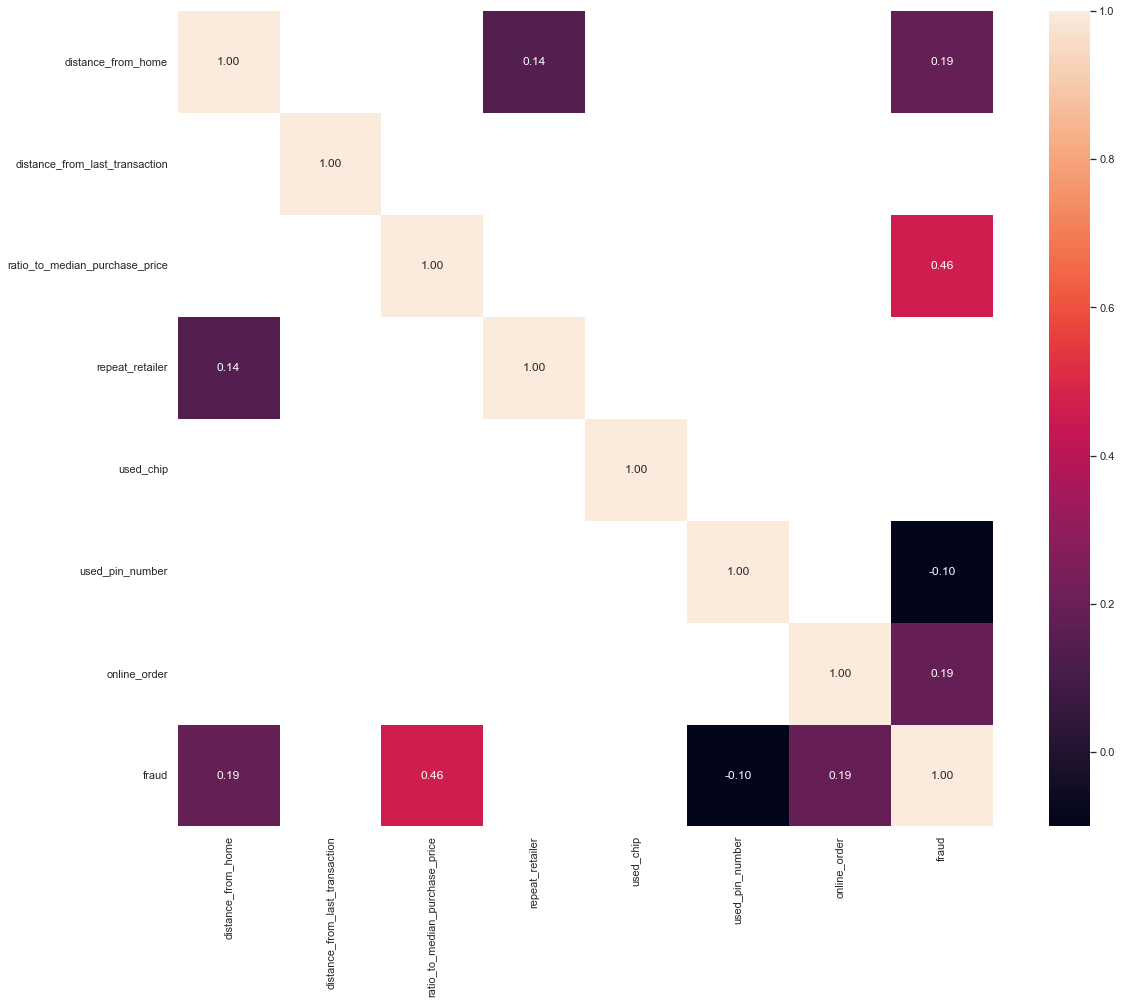

In [27]:
corr_matrox = df_cop1.corr()
# corr_matrox.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrox[(corr_matrox >= 0.1) | (corr_matrox <= -0.1)], square=True, annot=True, fmt='.2f')
plt.show()

Jika dilihat dari korelasinya, ternyata dari Ciri-Ciri yang kita lihat pada EDA, nampak Kecil Korelasinya jika dibandingkan dengan Kolom yang lain.

---

# 6. Data Preprocessing 

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.**

---

In [28]:
#membuat data khusus untuk menjadi model inference
data_inf = df_cop.sample(1000, random_state=6)
data_inf

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
917043,16,0,0,1,0,0,0,0
595512,4,0,0,1,0,1,0,0
461126,0,2,1,0,1,0,0,0
595554,28,0,2,1,1,0,1,0
501027,1,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
300646,9,1,1,1,0,0,0,0
834642,5,2,1,1,0,0,1,0
324035,40,0,0,1,0,0,1,0
363919,29,5,0,1,1,1,1,0


Ambil record dari dataset yang akan digunakan sebagai model inference 

In [29]:
#drop index data inf dari dataset yang ada

data_train_test = df_cop.drop(data_inf.index)
data_train_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57,0,1,1,1,0,0,0
1,10,0,1,1,0,0,0,0
2,5,0,0,1,0,0,1,0
3,2,5,0,1,1,0,1,0
4,44,0,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2,0,1,1,1,0,0,0
999996,19,2,2,1,1,0,0,0
999997,2,1,0,1,1,0,1,0
999998,4,0,0,1,0,0,1,0


In [30]:
#reset inde terhadap data train test

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,16,0,0,1,0,0,0,0
1,4,0,0,1,0,1,0,0
2,0,2,1,0,1,0,0,0
3,28,0,2,1,1,0,1,0
4,1,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,9,1,1,1,0,0,0,0
996,5,2,1,1,0,0,1,0
997,40,0,0,1,0,0,1,0
998,29,5,0,1,1,1,1,0


In [31]:
# Split between X (features) and y (target)

X = data_train_test.drop('fraud', axis=1)
y = data_train_test['fraud']
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57,0,1,1,1,0,0
1,10,0,1,1,0,0,0
2,5,0,0,1,0,0,1
3,2,5,0,1,1,0,1
4,44,0,2,1,1,0,1
...,...,...,...,...,...,...,...
998995,2,0,1,1,1,0,0
998996,19,2,2,1,1,0,0
998997,2,1,0,1,1,0,1
998998,4,0,0,1,0,0,1


**Split dataset**

*X merupakan feature yang akan kita gunakan untuk training (sebelum feature selection)*

*y merupakan target*

----

In [32]:
#split train-set dan test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (699300, 7)
Test Size  :  (299700, 7)


Stratify akan membalance kan proporsi kelas yang diberikan. Misalnya, jika variabel y adalah variabel kategoris biner dengan nilai 0 dan 1, jika ada 25% dari 0 dan 75% dari 1, stratify akan memastikan bahwa pemisahan acak memiliki 25% yg 0 dan 75% yg 1.

**Kita gunakan 70/30 sebagai pembagi train-test set. random state kita isikan acak.** 

----

## Data Outlier

num_eda = df_cop1[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']]
cat_eda = df_cop1[['used_chip','used_pin_number','online_order','repeat_retailer','fraud']]

In [33]:
num_train = X_train[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']].columns.to_list()
obj_train = X_train[['used_chip','used_pin_number','online_order','repeat_retailer']].columns.to_list()

Kita akan kelompokan Train yang memiliki Numerik dan Objek sebagai tipe datanya

In [34]:
num_test = X_test[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']].columns.to_list()
obj_test = X_test[['used_chip','used_pin_number','online_order','repeat_retailer']].columns.to_list()

Kita akan kelompokan Test yang memiliki Numerik dan Objek sebagai tipe datanya

In [35]:
def diagnostic_plots(df, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title('Boxplot')

    plt.show()
    

Membuat fungsi diagnostik visualisasi untuk melihat sebaran distribusi data

In [36]:
def skewed_features(X_train, columns):
    for column in columns:
        print(column)
        print('Skew:', X_train[column].skew())
        print()
        if X_train[column].skew() < 0.5 and X_train[column].skew() > -0.5:
            print('Kemungkinan data normal')
        elif X_train[column].skew() < -1 or X_train[column].skew() > 1:
            print('Highly Skewed')
        elif X_train[column].skew() >= -0.5 or X_train[column].skew() <= 0.5:
            print('moderately skewed')
        else:
            print('Skew is zero')
        diagnostic_plots(X_train, column)

Membuat fungsi untuk mengelompokan data yang distribusinya Skew, ataupun Normal

---

**Diagnostik Distribusi Data**

Kita akan lakukan cek distribusi data pada Train-set yang bertipe data Numerik

distance_from_home
Skew: 14.645184594000945

Highly Skewed


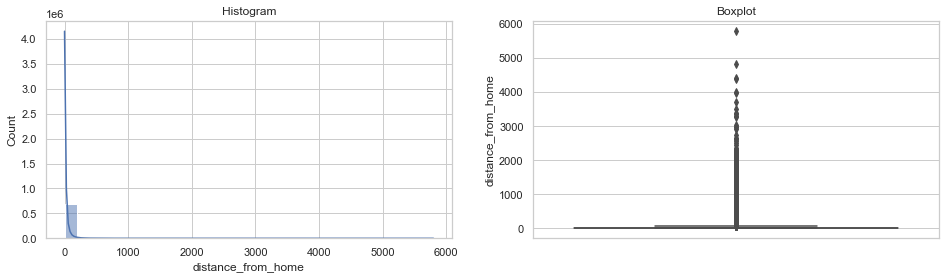

distance_from_last_transaction
Skew: 146.3119061655858

Highly Skewed


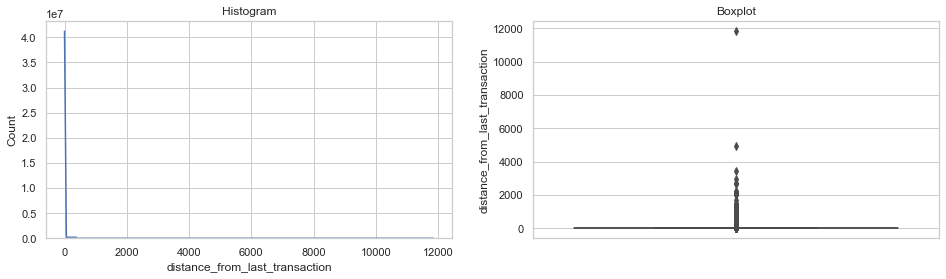

ratio_to_median_purchase_price
Skew: 8.68801904541459

Highly Skewed


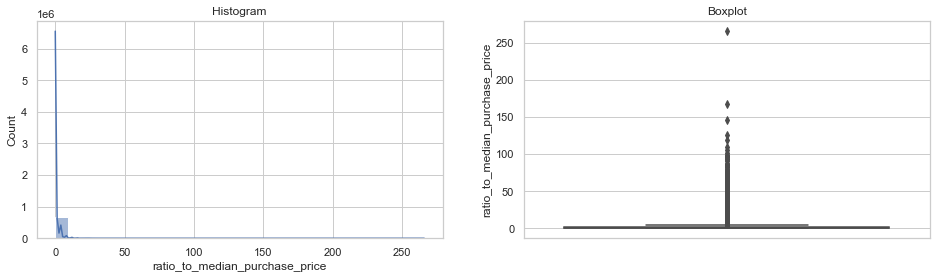

In [37]:
skewed_features(X_train, num_train)

Hasil yang didapat berupa, ternyata distribusi dari semua Kolom Skew. 
Karena data yang ada pada tiap feature merupakan value penting untuk model pembelajaran machine learning kita, maka outliernya tidak akan kita drop. 

---

**Capping**

In [38]:
capping = Winsorizer(capping_method='iqr',
                     tail='both',
                     fold=1.5,
                     variables=num_train)

X_train = capping.fit_transform(X_train)

distance_from_home
Skew: 1.1732679579284104

Highly Skewed


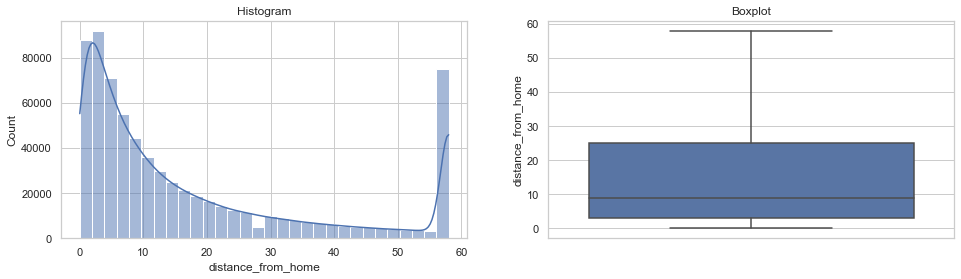

distance_from_last_transaction
Skew: 1.2464976844936484

Highly Skewed


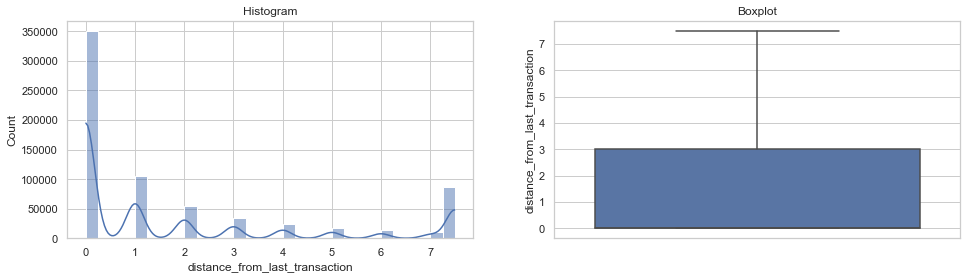

ratio_to_median_purchase_price
Skew: 1.4354898933886595

Highly Skewed


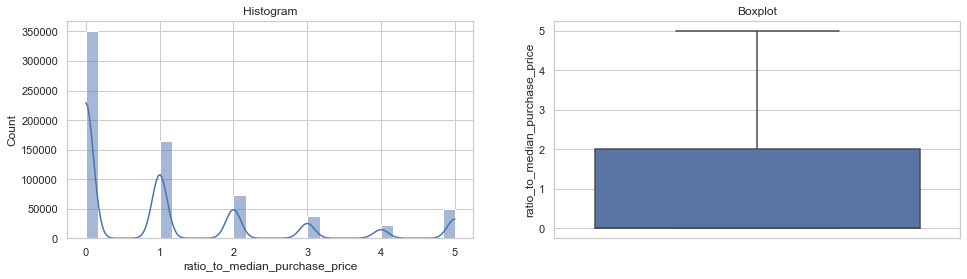

In [39]:
skewed_features(X_train, num_train)

Data masih terlihat Skewed, but this is the best thing we can do.

----

## Missing Value

**Kita akan bersihkan missing value dari data train-test set**

In [40]:
X_train.shape

(699300, 7)

In [41]:
y_train.shape

(699300,)

In [42]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
148942,35.0,0.0,0.0,1,1,0,1
295197,12.0,1.0,0.0,1,1,1,1
48031,27.0,0.0,1.0,1,1,0,1
539861,19.0,0.0,0.0,1,0,0,1
661683,6.0,0.0,0.0,1,0,0,1
...,...,...,...,...,...,...,...
536973,9.0,0.0,2.0,1,0,0,1
850036,58.0,0.0,0.0,1,1,1,0
959651,58.0,0.0,0.0,1,0,0,0
883502,13.0,0.0,0.0,1,1,1,0


**Cek numerical missing value**

**Train set**

In [43]:
miss_num = X_train[num_train].isnull().sum()
print(miss_num)

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
dtype: int64


Tidak ada Missing Value

---

**Test set**

In [44]:
miss_numte = X_test[num_test].isnull().sum()
print(miss_numte)

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
dtype: int64


Tidak ada Missing Value

---

**Cek objek missing value**

**Train set**

In [45]:
miss_obj = X_train[obj_train].isnull().sum()
print(miss_obj)

used_chip          0
used_pin_number    0
online_order       0
repeat_retailer    0
dtype: int64


Tidak ada Missing Value

----

**Test set**

In [46]:
miss_objte = X_test[obj_test].isnull().sum()
print(miss_objte)

used_chip          0
used_pin_number    0
online_order       0
repeat_retailer    0
dtype: int64


Tidak ada Missing Value

----

Data telah dibersihkan dan siap untuk diseleksi feature yang akan digunakan

---

## Feature Selection

**Pada tahapan ini kita akan pilih Feature yang akan dijadikan sebagai feature pembelajaran untuk model machine learning** 

---

Objek penyelesaian kasus ini adalah, dibuatnya model machine learning yang mampu memprediksi apakah seseorang melakukan Fraud atau tidak . Maka dari itu, Target feature yang akan kita gunakan pada kasus ini adalah **fraud**

---

In [47]:
#buat variabel untuk cek korelasi pada heatmap
corr_train = pd.concat([X_train,y_train],axis=1).corr()

Variabel untuk cek korelasi tiap feature

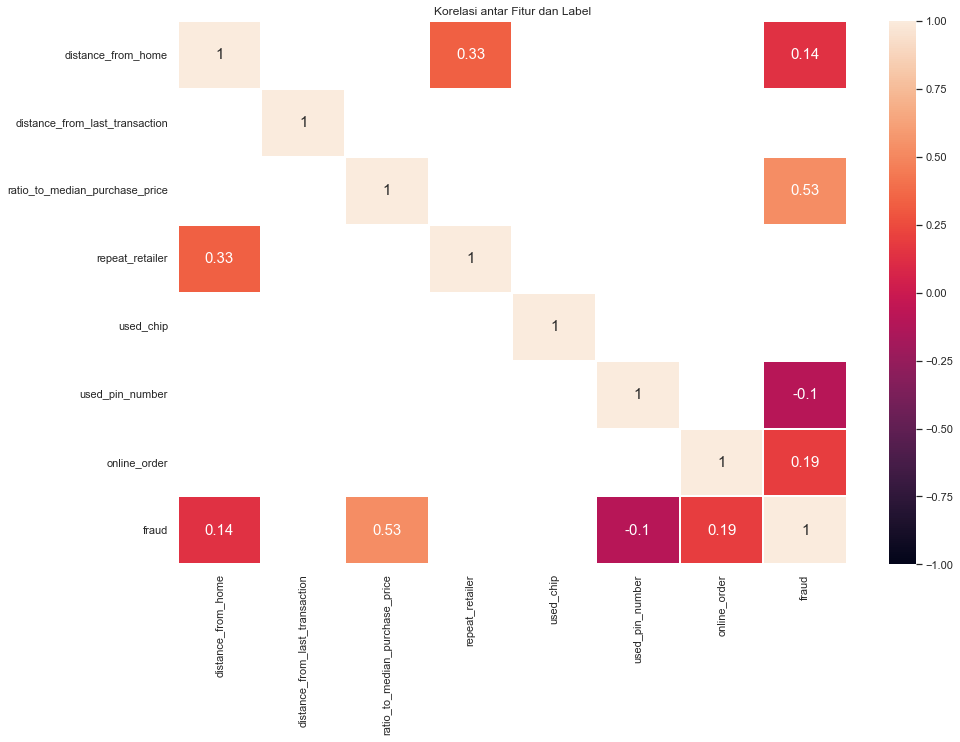

In [48]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.heatmap(corr_train[(corr_train >= 0.1) | (corr_train <= -0.1)],
            vmax=1.0, vmin=-1.0, linewidths=0.3,
           annot=True, annot_kws={"size": 15}, square=False)
plt.title('Korelasi antar Fitur dan Label')
plt.show()

In [49]:
corr_colum = corr_train >= 0.1
corr_columf = corr_colum[corr_colum == True]
corr_columf

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,True,NaN,NaN,True,NaN,NaN,NaN,True
distance_from_last_transaction,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
ratio_to_median_purchase_price,NaN,NaN,True,NaN,NaN,NaN,NaN,True
repeat_retailer,True,NaN,NaN,True,NaN,NaN,NaN,NaN
used_chip,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
used_pin_number,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
online_order,NaN,NaN,NaN,NaN,NaN,NaN,True,True
fraud,True,NaN,True,NaN,NaN,NaN,True,True


Dari hasil cek korelasi menggunakan metode pearson, kita dapatkan hasil bahwa ternyata 4 kolom berkorelasi dengan Target. Karena banyaknya feature yang berkorelasi, bisa kita simpulkan bahwa penggunaan antara feature dengan target, memiliki sinergi yang sama. meskipun nilainya cukup kecil.

---

In [50]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
148942,35.0,0.0,0.0,1,1,0,1
295197,12.0,1.0,0.0,1,1,1,1
48031,27.0,0.0,1.0,1,1,0,1
539861,19.0,0.0,0.0,1,0,0,1
661683,6.0,0.0,0.0,1,0,0,1
...,...,...,...,...,...,...,...
536973,9.0,0.0,2.0,1,0,0,1
850036,58.0,0.0,0.0,1,1,1,0
959651,58.0,0.0,0.0,1,0,0,0
883502,13.0,0.0,0.0,1,1,1,0


**Feature Importance**

In [51]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)
for name, score in zip(X_train, rnd_clf.feature_importances_):
    print(name, score)

distance_from_home 0.08415343490081517
distance_from_last_transaction 0.007194196298218868
ratio_to_median_purchase_price 0.6427006382345622
repeat_retailer 0.00530227963014883
used_chip 0.028714540267486356
used_pin_number 0.06553901340580319
online_order 0.1663958972629655


In [52]:
rnd_clf.feature_importances_

array([0.08415343, 0.0071942 , 0.64270064, 0.00530228, 0.02871454,
       0.06553901, 0.1663959 ])

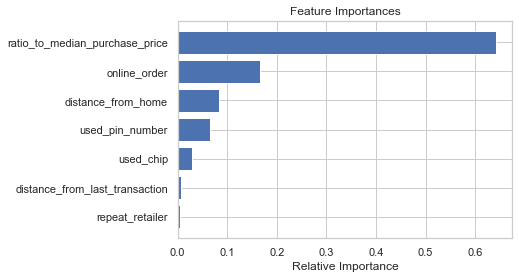

In [53]:
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Jika dilihat berdasarkan feature importance, dapat diambil kesimpulan bahwa **ratio_to_median_purchase_price** memiliki peranan penting terhadap prediksi 'fraud'. begitu juga dengan feature selanjutnya 

untuk Feature yang akan kita gunakan, karena feature yang kita miliki jumlahnya terbilang sedikit, jadi akan kita **gunakan semua Featurenya**

----

## Feature Scalling

**Agar tidak bias model machine learning kita, maka kita lakukan feature scalling**

----

In [54]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
num_columnstest = X_test.select_dtypes(include=np.number).columns.tolist()


print('Numerical Columns : ', num_columns)
print('Numerical Columns : ', num_columnstest)

Numerical Columns :  ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
Numerical Columns :  ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']


In [55]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train[num_columns]


X_test_num = X_test[num_columnstest]

print('X_train_num : ', X_train_num.shape)
print('X_test_num : ', X_test_num.shape)

X_train_num :  (699300, 7)
X_test_num :  (299700, 7)


Kita akan pisahkan train test ke dalam masing masing fungsi variable. Numerik untuk data bertipe Numerik, dan Obj untuk data yang bertipe kategori Object 

In [56]:
X_test_num

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
880550,7,2,1,1,1,0,1
147799,2,4,1,1,0,1,0
618331,0,1,4,0,1,0,0
401366,4,0,0,1,1,0,1
757485,33,3,1,1,1,0,1
...,...,...,...,...,...,...,...
44063,44,2,1,1,0,0,1
174420,1,0,0,0,1,0,1
669031,8,8,2,1,0,0,1
857041,54,8,1,1,0,0,0


In [57]:
X_train_num

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
148942,35.0,0.0,0.0,1,1,0,1
295197,12.0,1.0,0.0,1,1,1,1
48031,27.0,0.0,1.0,1,1,0,1
539861,19.0,0.0,0.0,1,0,0,1
661683,6.0,0.0,0.0,1,0,0,1
...,...,...,...,...,...,...,...
536973,9.0,0.0,2.0,1,0,0,1
850036,58.0,0.0,0.0,1,1,1,0
959651,58.0,0.0,0.0,1,0,0,0
883502,13.0,0.0,0.0,1,1,1,0


---

In [58]:
# Feature Scaling using RobustScaler

scaler = RobustScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [59]:
X_train_num_scaled.shape

(699300, 7)

In [60]:
X_test_num_scaled.shape

(299700, 7)

In [61]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

In [62]:
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

Kita gunakan Robust Scaler karena data kita yang sudah dihandling outliernya masih banyak yang terdistribusi Skew

Kita akan gunakan Robust Scaler pada feature scaling karena metode ini mempertahankan original distribusi data, sehingga tidak mengurangi importance of outliers **(tidak bias terhadap outlier)** 

Meskipun outliers Dari train-set tadi kita bersihkan, masih terdapat feature yang tidak kita bersihkan outliernya(pada test-set) 

---

## Feature Encoding

Karena data yang kita gunakan sudah bersifat Numerik, maka tidak perlu di encoding.

---

## SMOTE

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='fraud', ylabel='count'>

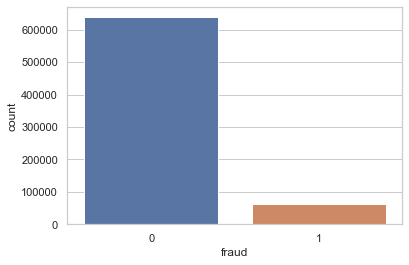

In [63]:
sns.countplot(y_train)

Jika kita lihat persebaran datanya, ternyata kita mendapatkan data yang imbalance. (**0 merupkana class No, 1 merupakan class Yes**). hal ini akan mempengaruhi proses pembelajaran pada model machine learning kita. maka dari itu, akan kita berlakukan **Random Oversampling** 

In [64]:
smote = SMOTE(k_neighbors=5, random_state=36)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_num_scaled, y_train)

---

In [65]:
y_train_end = y_train_balanced

In [66]:
X_train_end = X_train_balanced
X_train_end

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,1.181818,0.000000,0.0,0.0,1.0,0.0,0.0
1,0.136364,0.333333,0.0,0.0,1.0,1.0,0.0
2,0.818182,0.000000,0.5,0.0,1.0,0.0,0.0
3,0.454545,0.000000,0.0,0.0,0.0,0.0,0.0
4,-0.136364,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1276357,0.272727,0.000000,2.0,0.0,0.0,0.0,0.0
1276358,2.227273,0.000000,2.0,0.0,0.0,0.0,0.0
1276359,1.000000,0.000000,2.5,0.0,1.0,0.0,0.0
1276360,2.227273,1.666667,0.5,0.0,0.0,0.0,0.0


---

In [67]:
X_test_end = X_test_num_scaled
X_test_end

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.090909,0.666667,0.5,0.0,1.0,0.0,0.0
1,-0.318182,1.333333,0.5,0.0,0.0,1.0,-1.0
2,-0.409091,0.333333,2.0,-1.0,1.0,0.0,-1.0
3,-0.227273,0.000000,0.0,0.0,1.0,0.0,0.0
4,1.090909,1.000000,0.5,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
299695,1.590909,0.666667,0.5,0.0,0.0,0.0,0.0
299696,-0.363636,0.000000,0.0,-1.0,1.0,0.0,0.0
299697,-0.045455,2.666667,1.0,0.0,0.0,0.0,0.0
299698,2.045455,2.666667,0.5,0.0,0.0,0.0,-1.0


Setelah kita gabungkan, kita punya train-test yang siap untuk dimasukan kedalam model machine learning. 

**X_train -> X_train_end**

**X_test -> X_test_end**

---

# 7. Model Definition

**Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.**

----

#### **Deklarasi Model** 

**LogisticRegression**

In [68]:
log_reg = LogisticRegression(max_iter=1000)

**Decision Tree**

In [69]:
dt = DecisionTreeClassifier()

**Random Forest**

In [70]:
rdf = RandomForestClassifier()

**KNN**

In [71]:
knn = KNeighborsClassifier()

**Naive Bayes**

In [72]:
nb = GaussianNB()

**Other Algorithm**

----

# 8. Model Training

**Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.**

---

#### **Base Model** 

##### **Logistic Regression**

In [73]:
log_reg.fit(X_train_end, y_train_end) 

LogisticRegression(max_iter=1000)

Kita masukan data train-set kita dan y-train untuk dipelajari oleh model machine learning.

In [74]:
log_cross_val = cross_val_score(log_reg, 
                                      X_train_end, 
                                      y_train_end, 
                                      cv=3, scoring="accuracy")

print('Akurasi pada semua CV        : ', log_cross_val)
print('Akurasi Mean CV              : ', log_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', log_cross_val.std())
print('Akurasi Range of Test-Set    : ', (log_cross_val.mean()-log_cross_val.std()) , '-', (log_cross_val.mean()+log_cross_val.std()))

Akurasi pada semua CV        :  [0.92404584 0.92370268 0.92401764]
Akurasi Mean CV              :  0.9239220534613221
Akurasi Standar Deviasi CV   :  0.0001555472755689041
Akurasi Range of Test-Set    :  0.9237665061857532 - 0.9240776007368909


----

##### **Decision Tree**

In [75]:
dt.fit(X_train_end, y_train_end)

DecisionTreeClassifier()

In [76]:
dt_cross_val = cross_val_score(dt, 
                                      X_train_end, 
                                      y_train_end, 
                                      cv=3, scoring="accuracy")

print('Akurasi pada semua CV        : ', dt_cross_val)
print('Akurasi Mean CV              : ', dt_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', dt_cross_val.std())
print('Akurasi Range of Test-Set    : ', (dt_cross_val.mean()-dt_cross_val.std()) , '-', (dt_cross_val.mean()+dt_cross_val.std()))

Akurasi pada semua CV        :  [0.96655103 0.96683308 0.96731021]
Akurasi Mean CV              :  0.9668981057098222
Akurasi Standar Deviasi CV   :  0.0003133299898388791
Akurasi Range of Test-Set    :  0.9665847757199832 - 0.9672114356996611


##### **Random Forest**

In [77]:
rdf.fit(X_train_end, y_train_end)

RandomForestClassifier()

In [78]:
rdf_cross_val = cross_val_score(rdf, 
                                      X_train_end, 
                                      y_train_end, 
                                      cv=3, scoring="accuracy")

print('Akurasi pada semua CV        : ', rdf_cross_val)
print('Akurasi Mean CV              : ', rdf_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', rdf_cross_val.std())
print('Akurasi Range of Test-Set    : ', (rdf_cross_val.mean()-rdf_cross_val.std()) , '-', (rdf_cross_val.mean()+rdf_cross_val.std()))

Akurasi pada semua CV        :  [0.96649697 0.9667038  0.96716214]
Akurasi Mean CV              :  0.9667876354827235
Akurasi Standar Deviasi CV   :  0.00027794991605757446
Akurasi Range of Test-Set    :  0.9665096855666659 - 0.9670655853987811


##### **KNN** 

In [79]:
knn.fit(X_train_end, y_train_end)

KNeighborsClassifier()

In [80]:
knn_cross_val = cross_val_score(knn, 
                                      X_train_end, 
                                      y_train_end, 
                                      cv=3, scoring="accuracy")

print('Akurasi pada semua CV        : ', knn_cross_val)
print('Akurasi Mean CV              : ', knn_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', knn_cross_val.std())
print('Akurasi Range of Test-Set    : ', (knn_cross_val.mean()-knn_cross_val.std()) , '-', (knn_cross_val.mean()+knn_cross_val.std()))

Akurasi pada semua CV        :  [0.85965345 0.91210566 0.90622018]
Akurasi Mean CV              :  0.8926597626692114
Akurasi Standar Deviasi CV   :  0.02346233993219517
Akurasi Range of Test-Set    :  0.8691974227370163 - 0.9161221026014066


##### **Naive Bayes**

In [81]:
nb.fit(X_train_end, y_train_end)

GaussianNB()

In [82]:
nb_cross_val = cross_val_score(nb, 
                                      X_train_end, 
                                      y_train_end, 
                                      cv=3, scoring="accuracy")

print('Akurasi pada semua CV        : ', nb_cross_val)
print('Akurasi Mean CV              : ', nb_cross_val.mean())
print('Akurasi Standar Deviasi CV   : ', nb_cross_val.std())
print('Akurasi Range of Test-Set    : ', (nb_cross_val.mean()-nb_cross_val.std()) , '-', (nb_cross_val.mean()+nb_cross_val.std()))

Akurasi pada semua CV        :  [0.73941249 0.73909753 0.73812445]
Akurasi Mean CV              :  0.7388781552568942
Akurasi Standar Deviasi CV   :  0.00054824120631435
Akurasi Range of Test-Set    :  0.7383299140505798 - 0.7394263964632085


---

Jika dilihat hasil dari tiap algoritma menggunakan masing-masing baseline modelnya, dapat disimpulkan bahwa **Algoritma Random Forest** memiliki range akurasi pada Train-set **tertinggi** dengan **Range 97,26%-97,29%** <br>

Namun mengingat data yang kita gunakan memiliki Record yang lumayan besar, jika kita gunakan Random Forest akan memakan waktu yang lama ketika proses training dan Hyperparameter Tunningnya. Alternatif Algoritma yang akan kita gunakan adalah Decision Tree. Range Akurasi dari Decision Tree tidak terlalu jauh berbeda dengan Random Forest Classifier diamana prediksi akurasinya memiliki **Range 96,7%-96,7%** 

Mengetahui hasil tersebut, akan kita **eliminasi** penggunaan algortima yang lain, sehingga kita akan fokuskan **penggunaan Algoritma Decision Tree** untuk di *Hyperparameter tunning*, apakah Tingkat akurasinya dapat berubah. 

----

##### **Model Optimization** 

In [83]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters

max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2, 100, 10)]
min_samples_split = [2,3,6]
min_samples_leaf = [1, 2, 4]
random_grid = {
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini'],
               'splitter':['random','best']
               }
random_grid

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100],
 'min_samples_split': [2, 3, 6],
 'min_samples_leaf': [1, 2, 4],
 'criterion': ['entropy', 'gini'],
 'splitter': ['random', 'best']}

In [84]:
dt_randomcv = RandomizedSearchCV(estimator=DecisionTreeClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=5,
                                 cv=3, 
                                 random_state=6, 
                                 n_jobs=-1)
dt_randomcv.fit(X_train_end, y_train_end)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 6],
                                        'splitter': ['random', 'best']},
                   random_state=6)

In [85]:
dt_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 67,
 'criterion': 'entropy'}

In [86]:
# Get Best Estimator

dt_randomcv_best = dt_randomcv.best_estimator_ 

In [87]:
param_grid = {
    'criterion': [dt_randomcv.best_params_['criterion']],
    'max_depth': [dt_randomcv.best_params_['max_depth']],
    'max_features': [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf': [dt_randomcv.best_params_['min_samples_leaf'], 
                         dt_randomcv.best_params_['min_samples_leaf']+3, 
                         dt_randomcv.best_params_['min_samples_leaf'] + 5],
    'min_samples_split': [dt_randomcv.best_params_['min_samples_split'] - 3,
                          dt_randomcv.best_params_['min_samples_split'] - 1,
                          dt_randomcv.best_params_['min_samples_split'], 
                          dt_randomcv.best_params_['min_samples_split'] +1,
                          dt_randomcv.best_params_['min_samples_split'] + 3],
    'splitter': [dt_randomcv.best_params_['splitter']]
}

param_grid

{'criterion': ['entropy'],
 'max_depth': [67],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 5, 7],
 'min_samples_split': [3, 5, 6, 7, 9],
 'splitter': ['best']}

In [88]:
dt_gridcv = GridSearchCV(estimator=DecisionTreeClassifier(),
                         param_grid=param_grid,
                         cv=2,
                         n_jobs=-1)

dt_gridcv.fit(X_train_end, y_train_end)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [67],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [3, 5, 6, 7, 9],
                         'splitter': ['best']})

In [89]:
# Display Best Hyperparamters from Gridsearch

dt_gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 67,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [90]:
# Get Best Hyperparameters

dt_gridcv_best = dt_gridcv.best_estimator_

# 9. Model Evaluation

**Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**

---

##### **Evaluasi Random Forest**

**Base Model**

***Test-set***

Accuracy - Test Set   :  0.9462362362362362 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    273506
           1       0.62      0.98      0.76     26194

    accuracy                           0.95    299700
   macro avg       0.81      0.96      0.87    299700
weighted avg       0.97      0.95      0.95    299700
 

Confusion Matrix      : 


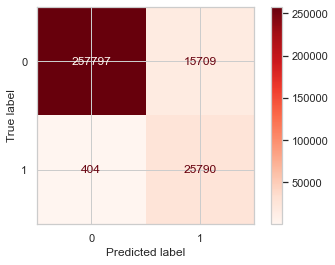

In [91]:
y_rdf_predict_test = rdf.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_rdf_predict_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_rdf_predict_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rdf, X_test_end, y_test, cmap='Reds'))

---

##### **Decision Tree Hyperparameter Tunning**

**Random Search**

***Train-set***

Accuracy - Train Set   :  0.9674543742292547 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97    638181
           1       0.95      0.99      0.97    638181

    accuracy                           0.97   1276362
   macro avg       0.97      0.97      0.97   1276362
weighted avg       0.97      0.97      0.97   1276362
 

Confusion Matrix      : 


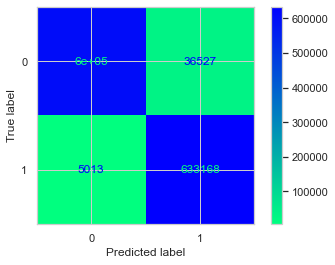

In [92]:
# Check Performance Model against Train-Set

y_pred_train = dt_randomcv_best.predict(X_train_end)

print('Accuracy - Train Set   : ', accuracy_score(y_train_end, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_end, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_train_end, y_train_end, cmap='winter_r'))

***Test-set***

Accuracy - Test Set   :  0.9462696029362696 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    273506
           1       0.62      0.98      0.76     26194

    accuracy                           0.95    299700
   macro avg       0.81      0.96      0.87    299700
weighted avg       0.97      0.95      0.95    299700
 

Confusion Matrix      : 


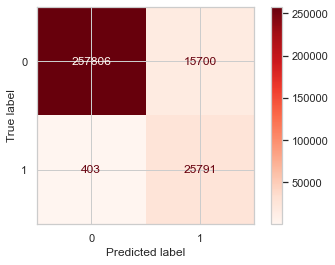

In [93]:
# Check Performance Model against Test-Set

y_pred_test = dt_randomcv_best.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_test_end, y_test, cmap='Reds'))

---

**Optimization berdasarkan Hyperparameter Random Search** 

***Train-set***

Accuracy - Train Set   :  0.9674481064149513 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97    638181
           1       0.95      0.99      0.97    638181

    accuracy                           0.97   1276362
   macro avg       0.97      0.97      0.97   1276362
weighted avg       0.97      0.97      0.97   1276362
 

Confusion Matrix      : 


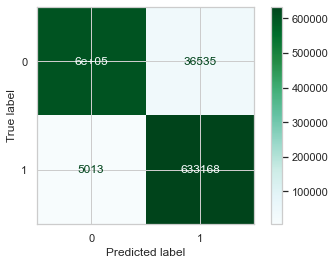

In [94]:
# Check Performance Model against Train-Set

y_predgcv_train = dt_gridcv_best.predict(X_train_end)

print('Accuracy - Train Set   : ', accuracy_score(y_train_end, y_predgcv_train), '\n')
print('Classification Report : \n', classification_report(y_train_end, y_predgcv_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_gridcv_best, X_train_end, y_train_end, cmap='BuGn'))

***Test-set***

Accuracy - Test Set   :  0.9462195528862195 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    273506
           1       0.62      0.98      0.76     26194

    accuracy                           0.95    299700
   macro avg       0.81      0.96      0.87    299700
weighted avg       0.97      0.95      0.95    299700
 

Confusion Matrix      : 


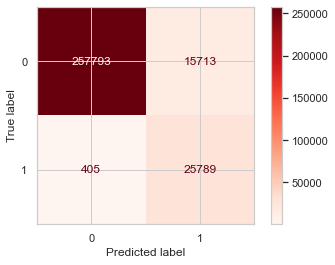

In [95]:
# Check Performance Model against test-Set

y_predgcv_test = dt_gridcv_best.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_predgcv_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_predgcv_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_gridcv_best, X_test_end, y_test, cmap='Reds'))

-----

##### **Evaluasi Model Logistik Regresi**

***Test-set***

Accuracy - Test Set   :  0.8352986319652986 

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    273506
           1       0.35      0.99      0.51     26194

    accuracy                           0.84    299700
   macro avg       0.67      0.91      0.71    299700
weighted avg       0.94      0.84      0.87    299700

Confusion Matrix      : 


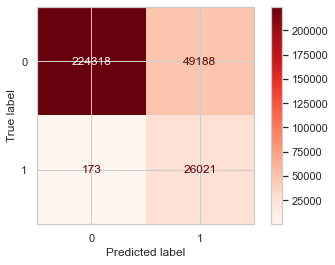

In [96]:
y_pred_log = log_reg.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_log), '\n')
print(classification_report(y_test, y_pred_log))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_reg, X_test_end, y_test, cmap='Reds'))

##### **Decision Tree**

Accuracy - Test Set   :  0.946312979646313 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    273506
           1       0.62      0.98      0.76     26194

    accuracy                           0.95    299700
   macro avg       0.81      0.96      0.87    299700
weighted avg       0.97      0.95      0.95    299700

Confusion Matrix      : 


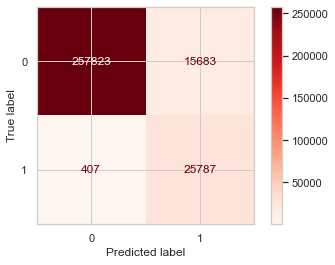

In [97]:
y_pred_dt = dt.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_dt), '\n')
print(classification_report(y_test, y_pred_dt))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt, X_test_end, y_test, cmap='Reds'))

##### **KNN**

Accuracy - Test Set   :  0.9742375709042376 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    273506
           1       0.88      0.81      0.85     26194

    accuracy                           0.97    299700
   macro avg       0.93      0.90      0.92    299700
weighted avg       0.97      0.97      0.97    299700

Confusion Matrix      : 


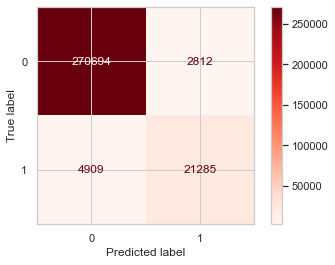

In [98]:
y_pred_knn = knn.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_knn), '\n')
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_test_end, y_test, cmap='Reds'))

##### **Naive Bayes**

Accuracy - Test Set   :  0.5223123123123123 

              precision    recall  f1-score   support

           0       1.00      0.48      0.65    273506
           1       0.15      0.98      0.26     26194

    accuracy                           0.52    299700
   macro avg       0.58      0.73      0.46    299700
weighted avg       0.92      0.52      0.61    299700

Confusion Matrix      : 


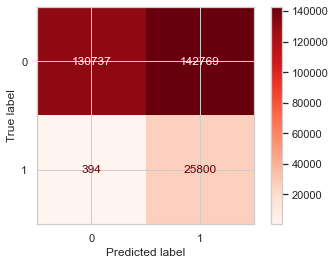

In [99]:
y_pred_nb = nb.predict(X_test_end)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_nb), '\n')
print(classification_report(y_test, y_pred_nb))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, X_test_end, y_test, cmap='Reds'))

---

##### **Summary terhadap Accuracy test - set dari tiap algortma** 

In [100]:
print('Accuracy - Test Set RDF   : ', accuracy_score(y_test, y_rdf_predict_test), '\n')
print('Accuracy - Test Set Log   : ', accuracy_score(y_test, y_pred_log), '\n')
print('Accuracy - Test Set DCT   : ', accuracy_score(y_test, y_pred_dt), '\n')
print('Accuracy - Test Set KNN   : ', accuracy_score(y_test, y_pred_knn), '\n')
print('Accuracy - Test Set NVB   : ', accuracy_score(y_test, y_pred_nb), '\n')

Accuracy - Test Set RDF   :  0.9462362362362362 

Accuracy - Test Set Log   :  0.8352986319652986 

Accuracy - Test Set DCT   :  0.946312979646313 

Accuracy - Test Set KNN   :  0.9742375709042376 

Accuracy - Test Set NVB   :  0.5223123123123123 



Dari hasil Akurasi pada test set diatas, kita simpulkan bahwa, algoritma dengan base model terbaik untuk penggunaannya pada dataset ini ada pada **Random Forest** 

Selanjutnya akan kita **bandingkan Base model** dari **Dec Tree**, dengan **Model** yang **sudah di Hyper parameter tunning**

In [101]:
print('Accuracy - Test Set (DT BaseModel)                      : ', accuracy_score(y_test, y_pred_dt), '\n')
print('Accuracy - Test Set (Random Search)                      : ', accuracy_score(y_test, y_pred_test), '\n')
print('Accuracy - Test Set (Tunning Berdasarkan Random Search)  : ', accuracy_score(y_test, y_predgcv_test), '\n')

Accuracy - Test Set (DT BaseModel)                      :  0.946312979646313 

Accuracy - Test Set (Random Search)                      :  0.9462696029362696 

Accuracy - Test Set (Tunning Berdasarkan Random Search)  :  0.9462195528862195 



Ternyata dari hasil perbandingannya, untuk **akurasi terbaik ada pada Base Model DT yang belum di Tunning.** <br>
Tunning pada Random Search meyebabkan akurasi turun, meskipun nilainya sangat kecil.

----

#### **PIPLINE**

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
import pickle

In [103]:
X_train_end

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,1.181818,0.000000,0.0,0.0,1.0,0.0,0.0
1,0.136364,0.333333,0.0,0.0,1.0,1.0,0.0
2,0.818182,0.000000,0.5,0.0,1.0,0.0,0.0
3,0.454545,0.000000,0.0,0.0,0.0,0.0,0.0
4,-0.136364,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1276357,0.272727,0.000000,2.0,0.0,0.0,0.0,0.0
1276358,2.227273,0.000000,2.0,0.0,0.0,0.0,0.0
1276359,1.000000,0.000000,2.5,0.0,1.0,0.0,0.0
1276360,2.227273,1.666667,0.5,0.0,0.0,0.0,0.0


In [104]:
X_train_num

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
148942,35.0,0.0,0.0,1,1,0,1
295197,12.0,1.0,0.0,1,1,1,1
48031,27.0,0.0,1.0,1,1,0,1
539861,19.0,0.0,0.0,1,0,0,1
661683,6.0,0.0,0.0,1,0,0,1
...,...,...,...,...,...,...,...
536973,9.0,0.0,2.0,1,0,0,1
850036,58.0,0.0,0.0,1,1,1,0
959651,58.0,0.0,0.0,1,0,0,0
883502,13.0,0.0,0.0,1,1,1,0


In [105]:
numerical_cols = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']

In [113]:
# outlier_pipe = make_pipeline( Winsorizer(capping_method='iqr',
#                      tail='both',
#                      fold=1.5
#                      ))

prep = ColumnTransformer(transformers=[('num', RobustScaler(), numerical_cols)])

sm = SMOTE(random_state=36)

dt_p = DecisionTreeClassifier(random_state=36)

final_pipline = Pipeline(steps=[
                                ('prep', prep),
                                ('smote', sm),
                                ('model', dt_p)])


In [114]:
finaly_pipline= make_pipeline(final_pipline)

In [116]:
finaly_pipline.fit_transform(X_train, y_train)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'transform'

In [ ]:
y_pred_pipe = finaly_pipline.predict(X_test)
print(classification_report(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    273506
           1       0.62      0.98      0.76     26194

    accuracy                           0.95    299700
   macro avg       0.81      0.96      0.87    299700
weighted avg       0.97      0.95      0.95    299700



In [ ]:
y_train_pred = finaly_pipline.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    638181
           1       0.62      0.99      0.76     61119

    accuracy                           0.95    699300
   macro avg       0.81      0.97      0.87    699300
weighted avg       0.97      0.95      0.95    699300



**Save the Pipeline**

In [ ]:
with open("dt_pipe_model.pkl", "wb") as f:
    pickle.dump(finaly_pipline, f)

---

# 10. Model Inference

In [ ]:
data_inf

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,16,0,0,1,0,0,0,0
1,4,0,0,1,0,1,0,0
2,0,2,1,0,1,0,0,0
3,28,0,2,1,1,0,1,0
4,1,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,9,1,1,1,0,0,0,0
996,5,2,1,1,0,0,1,0
997,40,0,0,1,0,0,1,0
998,29,5,0,1,1,1,1,0


In [ ]:
data_inf_end = data_inf.drop(['fraud'], axis=1)

In [ ]:
predicted_inf = finaly_pipline.predict(data_inf_end)

In [ ]:
dfpredicted_inf = pd.DataFrame(predicted_inf, columns=['fraud-prediction'])

In [ ]:
data_inf_final = pd.concat([data_inf, dfpredicted_inf], axis=1)

In [ ]:
data_inf_final

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,fraud-prediction
0,16,0,0,1,0,0,0,0,0
1,4,0,0,1,0,1,0,0,0
2,0,2,1,0,1,0,0,0,0
3,28,0,2,1,1,0,1,0,0
4,1,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
995,9,1,1,1,0,0,0,0,0
996,5,2,1,1,0,0,1,0,0
997,40,0,0,1,0,0,1,0,0
998,29,5,0,1,1,1,1,0,0


In [ ]:
data_inf_final['fraud-prediction'].value_counts()

0    856
1    144
Name: fraud-prediction, dtype: int64

In [ ]:
data_inf['fraud'].value_counts()

0    910
1     90
Name: fraud, dtype: int64

# 11. Pengambilan Kesimpulan

**Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.**

----

Melalui percobaan yang dilakukan dengan berbagai macam Algortma Machine Learning dibawah ini merupakan hasil Akurasi yang diperoleh : 

### Logistic Regression 

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model logistic regression pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 90%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 52%** 


Akurasi Algoritma Logistik Regression dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 90% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 52% 

---

### Decision Tree 

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model Decision Tree pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 97%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 76%** 


Akurasi Algoritma Decision Tree dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 97% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 76% 

----

### Random Forest 

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model Random Forest pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 97%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 76%** 


Akurasi Algoritma Random Forest dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 95% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 58% 

---

### KNN

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model KNN pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 99%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 85%** 


Akurasi Algoritma KNN dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 99% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 85% 

---

### Naive Bayes

Setelah melakukan preprocesing pada X_train dan y_train, yang kemudian diterapkannya model Naive Bayes pada data test, didapatkan hasil evaluasi score : 

berdasarkan hasil dari f1-scorenya : 

**Apabila Class 0 terdapat pada nilai TP (true positif) dapat memprediksi benar dengan akurasi 65%** 

**Apabila Class 1 terdapat pada nilai TP (True positif) dapat memprediksi benar dengan akurasi 26%** 


Akurasi Algoritma Naive Bayes dapat memprediksi class 0 Benar (TP) dari Test - set sebesar 65% dimana jika kita ambil nilai 0 pada Target = No 

Sedangkan class 1 yang apabila kita ambil nilai 1 pada Target = Yes (TP) dapat di prediksi benar dari Test - set sebesar 26% 

---

### Hyperparameter Tunning 

Pada saat proses Training, didapatkan Model dengan akurasi terbaik diantara model yang lainnya yaitu Algoritma Decision Tree Classifier yang kemudian dilakukan Hyperparameter Tunning untuk Optimization Modelnya. 

Hyperparameter Tunning dilakukan dengan menggunakan RandomSearch, yang ternyata Nilai Akurasinya turun meskipun kecil Nilainya. ini membuktikan, dengan default Base Model, Decision Tree Classifier dapat menghasilkan F1 Score/Akurasi yang baik dibandingkan dengan Setelah dilakukan Hyperparameter Tunning.

Kemudian dilakukan juga optimization Model dari RandomSearch, apakah nilai akurasinya dapat membaik atau tidak. hasilnya No. Akurasi terbaik tetap ada di Default atau Base Model dari RandomForestnya. 

### After Word

Karena data yang kita olah imbalance (Class 0 serta Class 1 yang memiliki perbedaan jumlah yang cukup jauh) mungkin mempengaruhi hasil dari Akurasi. Jika kita apply SMOTE pada training, Algoritma Machine Learning yang digunakan mampu memperbaiki prediksi pada class 1. 
Selain itu, Akurasi sendiri dapat dipengaruhi oleh proses preprocessing. Apakah metode yang digunakan tepat, sesuai dengan kebutuhan dari Dataset. Kemungkinan dapat terjadi Kesalahan pada proses preprocessing yang menyebabkan rendahnya nilai akurasi.  

Kembali ke case yang kita ambil. karena kita ingin memprediksi data fraud yang benar benar fraud, maka kita akan lihat pada nilai Recall nya. karena asumsi, apabila True Negatif (dalam kasus ini memiliki Nilai 1 yang artinya fraud) benar benar dideteksi True Negatif, maka itu yang kita cari. 

Hanya saja, hal yang berbahaya dari kasus deteksi fraud ini adalah, apabila terdapat data True Negatif yang dibaca True Positif(dalam kasus ini 0 merupakan True Positif) maka ini merupakan hal yang perlu dikhawatirkan mengingat, terdapat kasus fraud yang lolos dari hasil prediksi Model Machine Learning yang kita buat. Oleh karena itu, perlu ditinjau kembali, untuk dilihat manakah nilai Recall tertinggi yang dimiliki oleh model, sehingga mampu memberikan nilai Akurasi terbaik terhadap True Negatif.

---

Base Model dari KNN memiliki kejutan dengan menghasilkan nilai akurasi terhadap test-set terbaik yang pada awal training, memiliki nilai akurasi yang lebih rendah dibandingkan Base Model Training terbaik yaitu Decision Tree

----